In [24]:
import tensorflow as tf 
import matplotlib.pyplot as plt


(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data()


In [25]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean(axis=0)
y_train_std = y_train.std(axis=0)


x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std

x_test = (x_test - x_train_mean)/x_train_std
y_test = (y_test - y_train_mean)/y_train_std



x = tf.placeholder(tf.float32,(None,13),name='x')
y = tf.placeholder(tf.float32,(None,1),name='y')

w = tf.Variable(tf.random_normal((13,1)))

pred  = tf.matmul(x,w)

loss = tf.reduce_mean((y -pred)**2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss,_ = sess.run(
            [loss,train_step],
            feed_dict={
                x: x_train,
                y: y_train.reshape((-1,1))
            }
        )
        print('step:{},train_loss:{}'.format(step,train_loss))
        
        pred_=sess.run(
            pred,
            feed_dict={
                x: x_test
            }
        )



step:0,train_loss:7.8482232093811035
step:1,train_loss:3.0683538913726807
step:2,train_loss:2.139084577560425
step:3,train_loss:1.664377212524414
step:4,train_loss:1.3574845790863037
step:5,train_loss:1.1461068391799927
step:6,train_loss:0.9939038753509521
step:7,train_loss:0.8799465894699097
step:8,train_loss:0.7917152643203735
step:9,train_loss:0.7214813828468323
step:10,train_loss:0.6643092036247253
step:11,train_loss:0.616931676864624
step:12,train_loss:0.577106237411499
step:13,train_loss:0.543239951133728
step:14,train_loss:0.5141657590866089
step:15,train_loss:0.48900431394577026
step:16,train_loss:0.4670783281326294
step:17,train_loss:0.44785574078559875
step:18,train_loss:0.43091192841529846
step:19,train_loss:0.41590434312820435
step:20,train_loss:0.40255245566368103
step:21,train_loss:0.3906254768371582
step:22,train_loss:0.37993142008781433
step:23,train_loss:0.37030988931655884
step:24,train_loss:0.36162564158439636
step:25,train_loss:0.3537644147872925
step:26,train_loss:

In [ ]:
import numpy as np

def get_batches(x,y,batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled=x[indices]
    y_shuffled=y[indices]
    
    for i in range(0,n_data,batch_size):
        x_batch = x_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        yield x_batch,y_batch

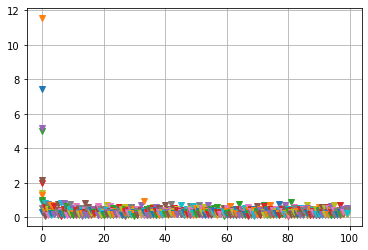

In [46]:

BATCH_SIZE = 32

step = 0


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train,y_train,32):
            train_loss, _ = sess.run(
                [loss,train_step],
                feed_dict={
                    x:x_batch,
                    y:y_batch.reshape((-1,1))
                    
                }
            )
            step +=1
            plt.plot(epoch,train_loss,marker="v")     
        pred_ = sess.run(
            pred,
            feed_dict={
                x:x_test
            }
        )
 
        plt.grid(True)